PCA

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
# 데이터셋 준비
iris = load_iris()
x = iris.data   # 특성 ( 4차원 )
y = iris.target # 클래스 ( 0, 1, 2)

In [5]:
print(x.shape)

(150, 4)


In [ ]:
print(x)

In [7]:
# 정규화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
# PCA 객체 생성
# n_components = 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [9]:
# pca 결과 출력
print('pca : ', pca.explained_variance_ratio_)

pca :  [0.72962445 0.22850762]


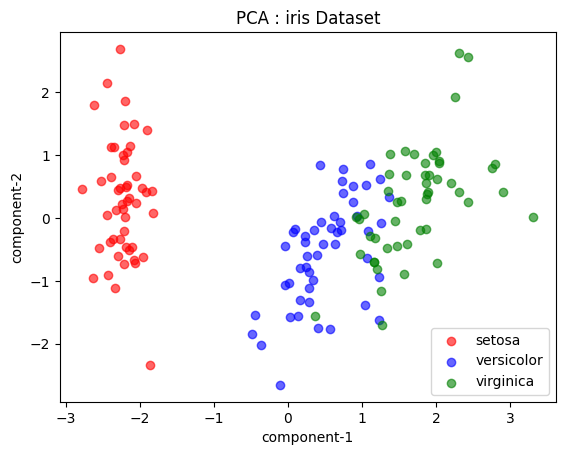

In [10]:
plt.Figure(figsize=(8, 6))
# (class, color, iris.target_names)
for target, color, label in zip([0,1,2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(x_pca[y == target, 0], 
                x_pca[y == target, 1],
                color=color, label=label, alpha=0.6
                )
plt.title('PCA : iris Dataset')
plt.xlabel('component-1')
plt.ylabel('component-2')
plt.legend()
plt.show()

In [71]:
# t-SNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [72]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [73]:
# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist.data, mnist.target # x: 이미지 벡터, y: 레이블


In [68]:
# 전처리
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [69]:
# t-SNE 객체 생성
#tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
tsne = TSNE(n_components=2, random_state=42, max_iter=1000, perplexity=30)
x_tsne = tsne.fit_transform(x_scaled[:2000])

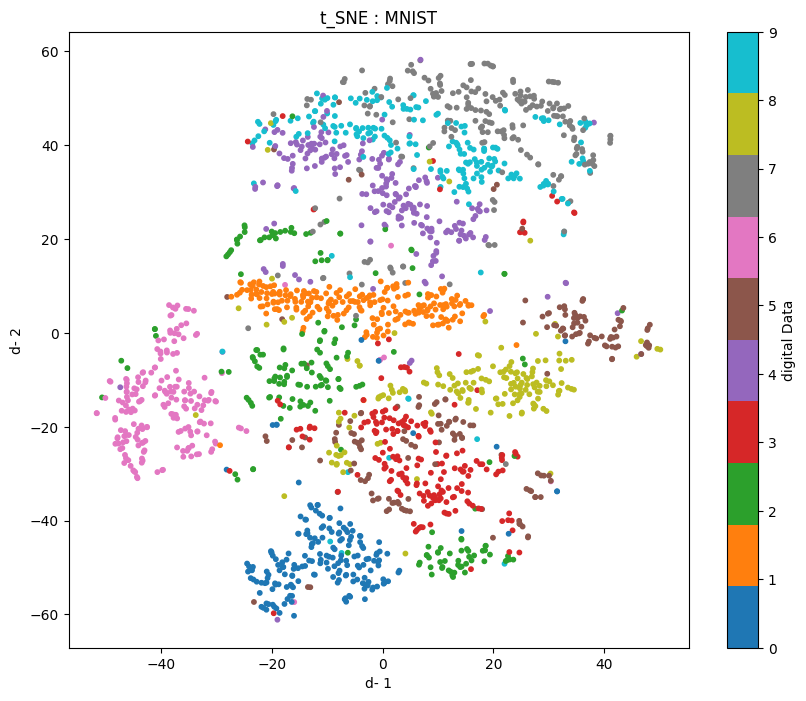

In [70]:
plt.figure(figsize=(10, 8))
#scatter = plt.scatter(x_tsne[:0], x_tsne[:1], c=y[:2000].astype(int), cmap='tab10', s=10)
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y[:2000].astype(int), cmap='tab10', s=10)
plt.colorbar(scatter, label='digital Data')
plt.title('t_SNE : MNIST')
plt.xlabel('d- 1')
plt.ylabel('d- 2')
plt.show()

In [33]:
# Isolation Forest : 이상치 탐지
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [34]:
# 데이터 생성
np.random.seed(42)

In [35]:
# 정상범위 데이터 생성 : (100개 , 2차원)
nomal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))


In [36]:
# 이상범위 데이터 생성 : 100~150 , 10개 2차원
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10, 2))

In [37]:
# 데이터 결합 => DataFrame
traffic_data = np.vstack((nomal_traffic, anomalous_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=['Request Count', 'Response Time'])

In [38]:
# 객체 생성 -> 학습 -> 결과
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

In [39]:
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)

In [40]:
traffic_df

,Request Count,Response Time,Anomaly Score
0,54.967142,48.617357,1
1,56.476885,65.230299,1
2,47.658466,47.658630,1
3,65.792128,57.674347,1
4,45.305256,55.425600,1
...,...,...,...
105,125.567120,125.075815,-1
106,139.914759,132.498197,-1
107,135.098344,139.789633,-1
108,144.500267,116.899758,-1


In [41]:
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(lambda x: "Normal" if x == 1 else "Anomaly")


In [42]:
traffic_df

,Request Count,Response Time,Anomaly Score,Anomaly
0,54.967142,48.617357,1,Normal
1,56.476885,65.230299,1,Normal
2,47.658466,47.658630,1,Normal
3,65.792128,57.674347,1,Normal
4,45.305256,55.425600,1,Normal
...,...,...,...,...
105,125.567120,125.075815,-1,Anomaly
106,139.914759,132.498197,-1,Anomaly
107,135.098344,139.789633,-1,Anomaly
108,144.500267,116.899758,-1,Anomaly


In [43]:
# 이상치의 범위 확인
anomalous_data = traffic_df[traffic_df['Anomaly'] == 'Anomaly']
print(anomalous_data)

     Request Count  Response Time  Anomaly Score  Anomaly
37       23.802549      58.219025             -1  Anomaly
100     143.868654     137.038431             -1  Anomaly
101     134.850787     135.124204             -1  Anomaly
102     117.974558     114.679592             -1  Anomaly
103     140.468058     140.505670             -1  Anomaly
104     143.353616     145.662028             -1  Anomaly
105     125.567120     125.075815             -1  Anomaly
106     139.914759     132.498197             -1  Anomaly
107     135.098344     139.789633             -1  Anomaly
108     144.500267     116.899758             -1  Anomaly
109     118.779148     104.699097             -1  Anomaly


In [44]:
min_req_count = anomalous_data['Request Count'].min()
max_req_count = anomalous_data['Request Count'].max()
min_res_time = anomalous_data['Response Time'].min()
max_res_time =anomalous_data['Response Time'].max()


In [45]:
print('min_req_count : ', min_req_count)
print('max_req_count : ', max_req_count)
print('min_res_time : ', min_res_time)
print('max_res_time : ', max_res_time)

min_req_count :  23.802548959102555
max_req_count :  144.5002670908783
min_res_time :  58.21902504375224
max_res_time :  145.66202762782356


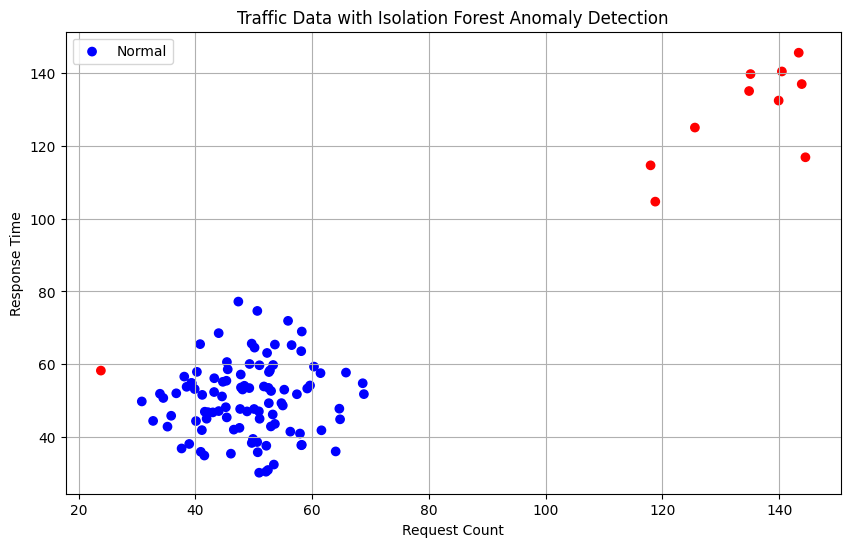

In [47]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df["Request Count"], traffic_df["Response Time"],
    c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":"red"}), # 색상 매핑
    label='Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count")
plt.ylabel("Response Time")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()

In [48]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [49]:
# 1. 데이터 생성
# 난수 시드 고정
np.random.seed(42)

# 정상 트래픽 데이터 생성 (평균: 50, 표준편차: 10)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))

# 비정상 트래픽 데이터 생성 (비정상적으로 높은 값)
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10,2))

# 데이터 결합
traffic_data = np.vstack((normal_traffic, anomalous_traffic))

# 데이터프레임으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count", "Response Time"])
print(traffic_df)

     Request Count  Response Time
0        54.967142      48.617357
1        56.476885      65.230299
2        47.658466      47.658630
3        65.792128      57.674347
4        45.305256      55.425600
..             ...            ...
105     125.567120     125.075815
106     139.914759     132.498197
107     135.098344     139.789633
108     144.500267     116.899758
109     118.779148     104.699097

[110 rows x 2 columns]


In [50]:
# DBSCAN  객체 생성 => 훈련 => 결과 => DataFrame 열 추가
dbscan = DBSCAN(eps=15, min_samples=5)

In [51]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [52]:
traffic_df

,Request Count,Response Time,Cluster
0,54.967142,48.617357,0
1,56.476885,65.230299,0
2,47.658466,47.658630,0
3,65.792128,57.674347,0
4,45.305256,55.425600,0
...,...,...,...
105,125.567120,125.075815,1
106,139.914759,132.498197,1
107,135.098344,139.789633,1
108,144.500267,116.899758,-1


In [54]:
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x: "Anomaly" if x == -1 else "Normal")


In [55]:
traffic_df

,Request Count,Response Time,Cluster,Anomaly
0,54.967142,48.617357,0,Normal
1,56.476885,65.230299,0,Normal
2,47.658466,47.658630,0,Normal
3,65.792128,57.674347,0,Normal
4,45.305256,55.425600,0,Normal
...,...,...,...,...
105,125.567120,125.075815,1,Normal
106,139.914759,132.498197,1,Normal
107,135.098344,139.789633,1,Normal
108,144.500267,116.899758,-1,Anomaly


In [58]:
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]

In [59]:
min_req_count = anomalous_data['Request Count'].min()
max_req_count = anomalous_data['Request Count'].max()
min_res_time = anomalous_data['Response Time'].min()
max_res_time = anomalous_data['Response Time'].max()

In [60]:
print('min_req_count : ', min_req_count)
print('max_req_count : ', max_req_count)
print('min_res_time : ', min_res_time)
print('max_res_time : ', max_res_time)

min_req_count :  117.97455756098776
max_req_count :  144.5002670908783
min_res_time :  104.69909699204345
max_res_time :  116.89975784257679


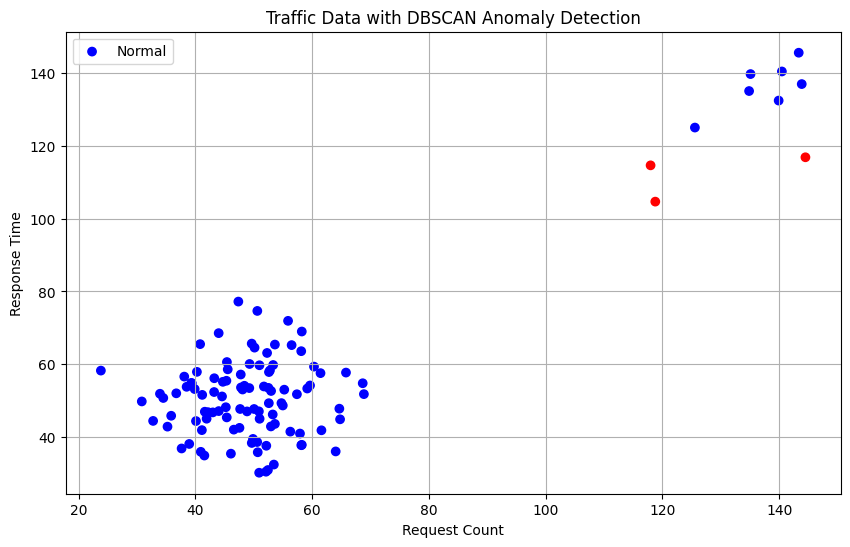

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df["Request Count"], traffic_df["Response Time"],
    c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":"red"}), # 색상 매핑
    label="Traffic"
)
plt.title("Traffic Data with DBSCAN Anomaly Detection")
plt.xlabel("Request Count")
plt.ylabel("Response Time")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()